<a href="https://colab.research.google.com/github/Minseo-202103621/machinelearning_deeplearning/blob/main/CH)07_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련
## 인공 신경망 모델을 훈련하는 모범 사례와 필요한 도구들을 살펴보겠다. 이런 도구들을 다뤄 보면서 텐서플로와 케라스 API에 더 익숙해 질 것이다.

BEFRORE: 7장에서 인공 신경망에 대해 배우고 텐서플로의 케라스 API를 사용해 직접 만들어 보았다. 1개 이상의 층을 추가하여 심층 신경망을 구성하고 다양한 고급 옵티마이저를 적용하는 방법도 알아보았다.

머신러닝 알고리즘은 좋은 성능을 내기 위해 매개변수를 조정하고 훈련하는 과정을 반복한다. 이런 알고리즘들은 모델의 구조가 어느 정도 고정되어 있다고 느낄 수 있다.

반면 딥러닝에서는 모델의 구조를 직접 만든다는 느낌이 훨씬 강하다. 층을 추가하고 층에 있는 뉴런의 개수와 활성화 함수를 결정하는 일들이 그렇다.

이번 챕터에서는 케라스 API를 사용해 모델을 훈련하는데 필요한 다양한 도구들을 알아보겠다. 이 과정에서 여러 가지 중요한 개념과 모범 사례를 공부하겠다.

---

# 손실 곡선

2절에서 fit() 메서드로 모델을 훈련하면 훈련 과정이 상세하게 출력되어 확인할 수 있었다. 여기에는 에포크 횟수, 손실, 정확도 등이 있다. 그런데 이 출력 마지막에 다음과 같은 메시지가 있었다.

- <keras.callbacks.History at 0x7f23f14b3910>

이 메시지는 fit() 메서드의 실행 결과를 출력한 것이다. 다시 말해 fit() 메서드가 무엇인가 반환한다는 증거다.

사실 케라스의 fit()메서드는 History 클래스 객체를 반환한다. History 객체에는 훈련 과정에서 계산한 지표 즉 손실과 정확도 값이 저장되어 있다. 이 값을 사용하면 그래프를 그릴 수 있다.

* 먼저 패션 MNIST 데이터셋을 적재하고 훈련 세트와 검증 세트로 나누겠다.


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)



4422102/4422102 [==============================] - 1s 0us/step


* 그 다음 모델을 만들겠다. 그런데 이전과 다르게 모델을 만드는 간단한 함수를 정의하겠다. 이 함수는 하나의 매개변수를 가진다.

In [ ]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model


if구문을 제외하면 이 전 코드들과 동일한 모델이다.

if 구문의 역할은 model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것이다.

* 여기서는 a_layer 매개변수로 층을 추가하지 않고 단순하게 model_fn() 함수를 호출한다. 그리고 모델 구조를 출력하면 이전 절과 동일한 모델이라는 것을 확인할 수 있다.

In [ ]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


이전 절과 동일하게 모델을 훈련하지만 fit() 메서드의 결과를 history 변수에 담아 보겠다.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=5,verbose=0)

- verbose 매개변수는 훈련 과정 출력을 조절한다. 기본값은 1로 이전 절에서처럼 에포크마다 진행 막대와 함께 손실 등의 지표가 출력된다. 2로 바꾸면 진행 막대를 빼고 출력된다. 이번 절에서는 훈련 결과를 그래프로 나타내는 대신 verbose 매개변수를 0으로 지정하여 훈련 과정을 나타내지 않겠다.

 history 객체에는 훈련 측정값이 담겨 있는 history 딕셔너리가 들어 있다. 이 딕셔너리에 어떤 값이 들어 있는지 확인해 보자.

In [ ]:
print(history.history.keys())
print(history.history)

dict_keys(['loss', 'accuracy'])
{'loss': [0.5291122794151306, 0.39288607239723206, 0.35588538646698, 0.3334210515022278, 0.3172875940799713], 'accuracy': [0.8140000104904175, 0.859541654586792, 0.8731874823570251, 0.8801875114440918, 0.886020839214325]}


손실과 정확도가 포함되어 있다. 이전 절에서 언급했듯이 케라스는 기본적으로 에포크마다 손실을 계산한다.

정확도는 compile() 메서드에서 metrics 매개변수에 'accuracy'를 추가했기 때문에 history 속성에 포홤된다.

history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트이다.
*  맷플롯립을 사용해 쉽게 그래프로 그릴 수 있다.

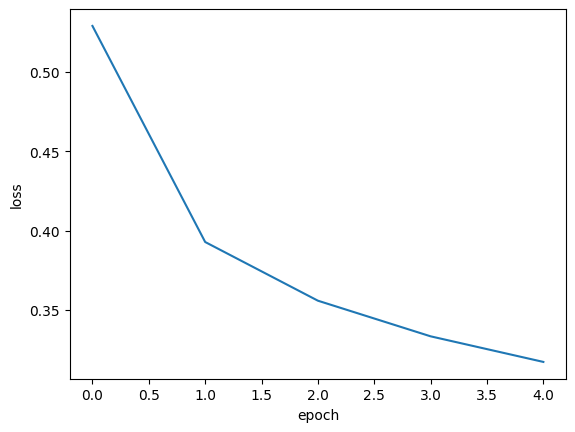

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

파이썬 리스트의 인덱스는 0부터 시작하므로 5개의 에포크가 0에서부터 4까지 x축에 표현된다. y축은 계산된 손실 값이다.

* 이번에는 정확도를 출력해 보겠다.

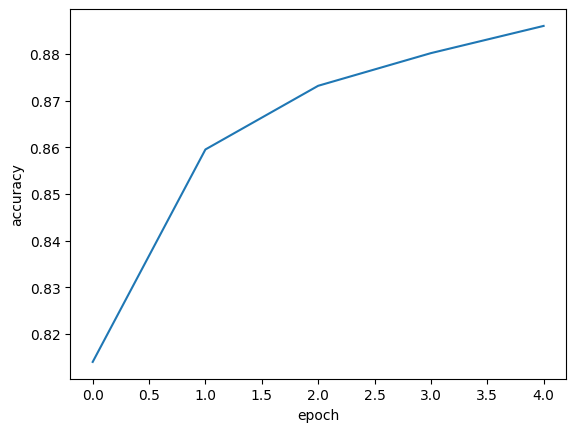

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

확실히 에포크마다 손실이 감소하고 정확도가 증가한다. 그렇다면 에포크를 늘려서 더 훈련해 보자.

* 에포크 횟수를 20으로 늘려서 모델을 훈련하고 손실 그래프를 그려 보겠다.

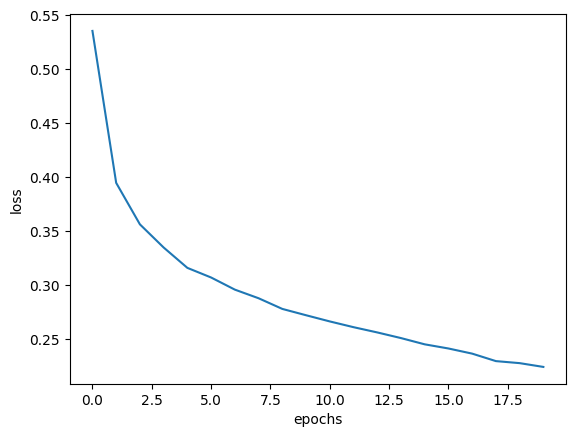

In [ ]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

예상대로 손실이 잘 감소한다. 근데 과연 이전보다 더 나은 모델을 훈련한 것이가?? 이전에 공부했던 것 중에 놓친 것이 있는거 같은데..

---
# 검증 손실

4장에서 확률적 경사 하강법을 사용했을 때 과대/과소적합과 에포크 사이의 관계를 알아봤다. 인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용된다.

에포크에 따른 과대 과소 적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요하다. 따라서 앞에서처럼 훈련 세트의 손실만 그려서는 안된다.

에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달할 수 있다.
* 다음처럼 validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달한다.

In [ ]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data = (val_scaled,val_target))


* 반환된 history.history 딕셔너리에 어떤 값이 들어 있는지 키를 확인해 보자.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


검증 세트에 대한 손실은 'val_loss'에 들어 있고 정확도는 'val_accuracy'에 들어 있다.

* 과대/과소 적합 문제를 조사하기 위해 훈련 손실과 검증 손실을 한 그래프에 그려서 비교해 보겠다.

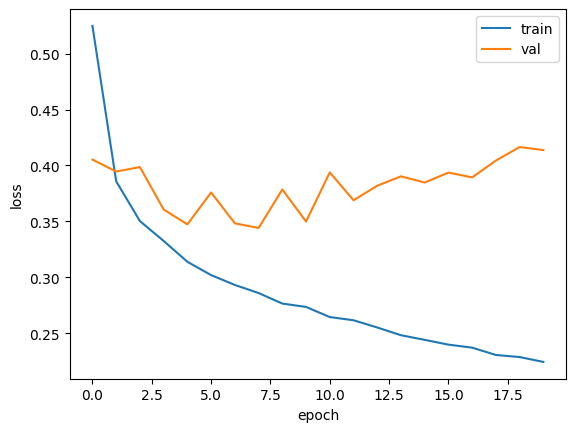

In [ ]:
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.xlabel('epoch')
 plt.ylabel('loss')
 plt.legend(['train','val'])
 plt.show()

초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승하기 시작한다.

훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어진다.

검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것이다.

과대적합을 막기 위해 신경망에 특화된 규제 방법을 다음 섹션에서 공부하고 당장은 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킬 수 있는지 알아보겠다.

기본 RMSprop 옵티마이저는 많은 문제에서 잘 동작한다. 만약 이 옵티마이저 대신 다른 옵티마이저를 테스트해 본다면 Adam이 좋은 선택이다.

Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있다. Adam 옵티마이저를 적용해 보고 훈련 손실과 검증 손실을 다시 그려 보자.



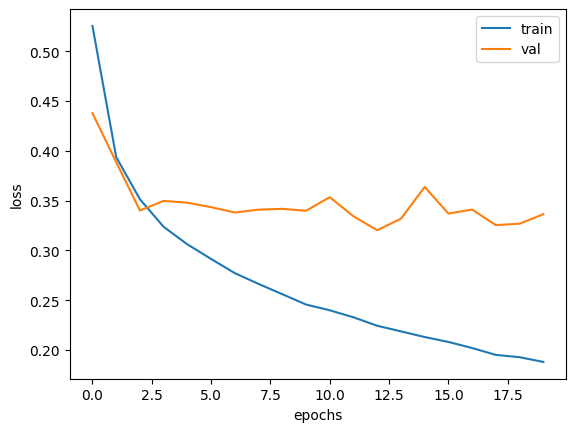

In [ ]:
model = model_fn()
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data = (val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

과대적합이 훨씬 줄었다. 검증 손실 그래프에 여전히 요동이 남아 있지만 열 번째 에포크까지 전반적인 감소 추세가 이어지고 있다. 이는 Adam 옵티마이저가 이 데이터셋에 잘 맞는다는 것을 보여준다.

더 나은 손실 곡선을 얻으려면 학습률을 조정해서 다시 시도해 볼 수 있다.

---

# 드롭아웃

드롭아웃은 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(즉 뉴런의 출력을 0으로 만들어) 과대적합을 막는다.

어떤 샘플을 처리할 때는 은닉층의 두 번째 뉴런이 드롭아웃되어 h2 출력이 없다. 다른 샘플을 처리할 때는 은닉층의 첫 번째 뉴런이 드롭아웃되어 h1 출력이 없다.

뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지는 우리가 정해야 할 또 다른 하이퍼파라미터이다.

드롭아웃이 왜 과대적합을 막을까??

>> 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 한다. 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있을 것이다.

케라스에서는 드롭아웃을 keras.layers 패키지 아래 Dropout 클래스로 제공한다.

어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만드는 거다. 드롭아웃이 층처럼 사용되지만 훈련되는 모델 파라미터는 없다.

* 앞서 정의한 model_fn() 함수에 드롭아웃 객체를 전달하여 층을 추가해 보겠다. 여기에는 30% 정도를 드롭아웃한다.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


출력 결과에서 볼 수 있듯이 은닉층 뒤에 추가된 드롭아웃 층(Dropout)은 훈련되는 모델 파라미터가 없다. 또한 입력과 출력의 크기가 같다. 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않는다.

물론 훈련이 끝난 뒤에 평가나 예측을 수행할 떄는 훈련된 모든 뉴런을 사용해야 올바른 예측을 수행할 수 있기 때문에 드롭아웃을 적용하지 말아야 한다.

다행이도 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않는다. 그래서 마음 편하게 검증 점수를 계산할 수 있다.

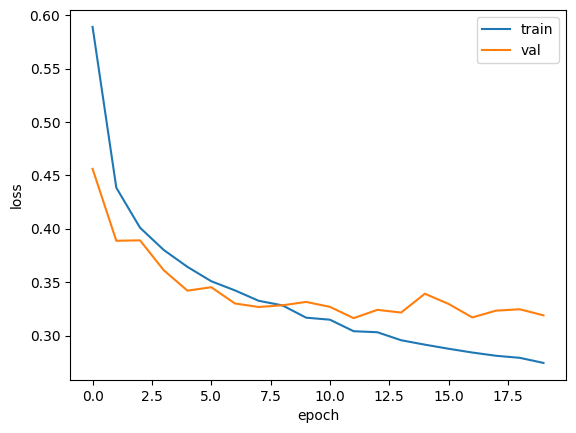

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

과대적합이 확실히 줄었다. 열 번째 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느 정도 유지되고 있다.

이 모델은 20번의 에포크 동안 훈련을 했기 때문에 결국 다소 과대적합 되어 있다. 그렇다면 과대적합 되지 않은 모델을 얻기 위해 에포크 횟수를 10으로 하고 다시 훈련해야겠다.

---


# 모델 저장과 복원

에포크 횟수를 10으로 지정하고 모델을 다시 훈련하겠다.

그리고 나중을 위해서 이 모델을 저장해야 한다.



In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=10, verbose=0,validation_data = (val_scaled,val_target))

케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공한다.

기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.



In [ ]:
model.save_weights('model-weights.h5')


또한 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드도 제공한다. 기본적으로 이 메서드는 텐서플로의 SavedModel 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.



In [ ]:
model.save('model-whole.h5')

* 이 두 파일이 잘 만들어졌는지 확인해 보자

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Jun 12 13:57 model-weights.h5
-rw-r--r-- 1 root root 981176 Jun 12 13:57 model-whole.h5


두 가지 실험을 해보자.

 첫 번째는 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용한다.

두 번째는 아예 model-whole.h5파일에서 새로운 모델을 만들어 바로 사용하자.


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')


훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터를 적재했다.

이 때 사용하는 메서드는 save_weights()와 쌍을 이루는 load_weights()메서드이다.

>> 모델 파라미터를 적재하는 조건?? : load_weights() 메서드를 사용하려면 save_weights()메서드로 저장했던 모델과 정확히 같은 구조를 가져야 한다. 그렇지 않으면 에러가 발생한다. 여기에서는 model_fn() 함수를 사용해 동일한 모델을 만들어서 사용했다.

이 모델의 검증 정확도를 확인해 보겠다.

케라스에 예측을 수행하는 predict() 메서드는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환한다. 패션 MNIST 데이터셋이 다중 분류 문제이기 때문이다.

패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 개수는 12,000개이기 때문에 predict() 메서드는 (12000,10) 크기의 배열을 반환한다.

따라서 10개 확률 중에서 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도를 계산해 보자.

In [ ]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.8775833333333334


모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax() 함수를 사용한다. 이 함수는 배열에서 가장 큰 값의 인덱스를 반환한다. 첫 번째가 가장 큰 값일 경우 0을 반환한다.

axis = -1은 배열의 마지막 차원을 따라 최대값을 고른다. 검증 세트는 2차원 배열이기 떄문에 마지막 차원은 1이 된다.

그 다음 라인은 argmax()로 고른 인덱스와 타깃을 비교한다. 같으면 1 다르면 0이다.그리고 이를 평균하면 정확도가 된다.

이번에는 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해 보겠다.

모델이 저장된 파일을 읽을 때는 케라스가 제공하는 load_model() 함수를 사용한다.

In [ ]:
model = keras.model.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

>> 여기에서는 어떻게 evaluate() 메서드를 사용할 수 있나요? : load_model() 함수는 모델 파라미터뿐만 아니라 모델 구조와 옵티마이저 상태까지 모두 복원하기 때문에 evaluate()메서드를 사용할 수 있다. 텐서플로 2.3에서는 load_model() 함수의 버그 때문에 evaluate() 메서드를 사용하기 전에 compile() 메서드를 호출해야 한다.

그런데 이 과정을 돌이켜 보면 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인했다. 그 다음 모델을 과대적합 되지 않는 에포크만큼 다시 훈련했다. 모델을 두 번씩 훈련하지 않고 한 번에 끝낼 수는 없을까?

드디어 케라스의 콜백을 사용할 차례이다.

---

# 콜백

콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들이다. fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용한다.

여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장한다. save_best_only = True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

* 저장된 파일 이름을 'best-model.h5'로 지정하여 콜백을 적용해 보겠다.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only = True)
model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data = (val_scaled,val_target),callbacks=[checkpoint_cb])

model_fn() 함수로 모델을 만들고 compile() 메서드를 호출하는 것은 이전과 동일하다.

ModelCheckpoint 클래스의 객체 checkpoint_cb를 만든 후 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달한다.

모델이 훈련한 후에 best-model.h5에 최상의 검증 점수를 낸 모델이 저장된다. 이 모델을 load_model() 함수로 다시 읽어서 예측을 수행해 보자.

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3144 - accuracy: 0.8873


[0.31442949175834656, 0.887333333492279]

훨씬 편하다. ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었다. 하지만 여전히 20번의 에포크 동안 훈련을 한다.

사실 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없다. 이때 훈련을 중지하면 컴퓨터 자원과 시간을 아낄 수 있다.

이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기 종료라고 부르며, 딥러닝 분야에서 널리 사용한다.

조기 종료는 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 생각할 수도 있다.

케라스에는 조기 종료를 위한 EarlyStopping 콜백을 제공한다. 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정한다.

예를 들어 다음 코드에서처럼 patience = 2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지한다.

또한 restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.

EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있다.

또한 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌린다.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights = True)
history = model.fit(train_scaled,train_target,epochs=20,verbose = 0 , validation_data = (val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

훈련을 마치고 나면 몇 번째 에포크에서 훈련이 중지되었는지 early_stopping_cb 객체의 stopped_epoch 속성에서 확인할 수 있다.

In [ ]:
print(early_stopping_cb.stopped_epoch)

16


16에서 중지 되었다는 것은 에포크 횟수가 0부터 시작이니 17번 쨰 에포크에서 훈련이 중지 되었다는 것이며 patience가 2니까 15번째 에포크가 최상의 모델이다.

* 훈련 손실과 검증 손실을 출력해서 확인해 보자

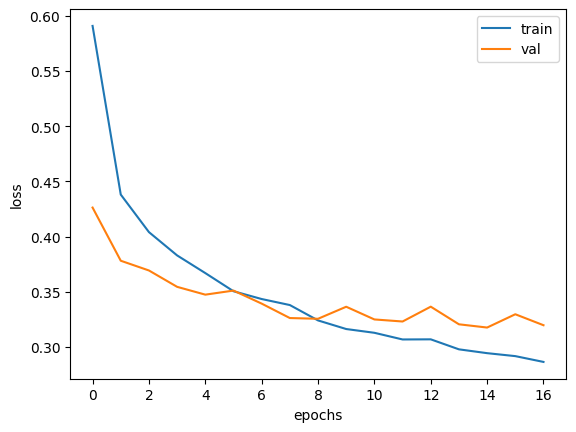

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

15번째 에포크에서 가장 낮은 손실을 기록했고 17번째 에포크에서 훈련이 중지됐다.

* 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능을 확인해 보겠다.



In [ ]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3177 - accuracy: 0.8850


[0.3176504373550415, 0.8849999904632568]